In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import svgpathtools as svg

In [3]:
import pathlib

In [4]:
from matplotlib.path import Path

In [5]:
file_path = pathlib.Path("C:/Users/cferster/Desktop")

In [6]:
paths, attributes = svg.svg2paths(str(file_path / "drawing.svg"))


In [431]:
mpl_paths = []
for path in paths:
    mpl_paths.append(beamz.svg_to_mpl.svg_path_parse(path.d()))

In [432]:
import matplotlib.transforms as transforms

In [433]:
aff_scale = transforms.Affine2D()
aff_scale.scale(1, -1)
aff_shift = transforms.Affine2D()
aff_shift.translate(50, 400)
trans = aff_scale + aff_shift

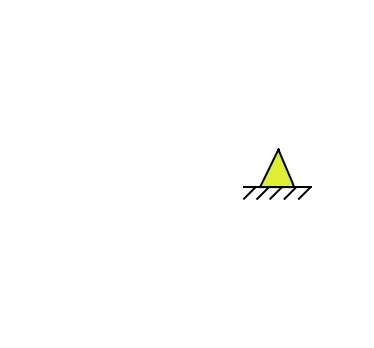

In [434]:
xmin, ymin, xmax, ymax = float('inf'), float('inf'), float('-inf'), float('-inf')
for path in mpl_paths:
    verts = path.vertices
    current_xmin, current_ymin = (verts.min(axis=0) - 1)
    current_xmax, current_ymax = (verts.max(axis=0) + 1)
    xmin, ymin = min(xmin, current_xmin), min(ymin, current_ymin)
    xmax, ymax = max(xmax, current_xmax), max(ymax, current_ymax)
    
fig = plt.figure(figsize=(5, 5), facecolor="1")  # gray background
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1,
                xlim=(-xmin*4, xmax*2),  # centering
                  ylim=(-ymin*4, ymax*2),  # centering, upside down
                  xticks=[], yticks=[])  # no ticks


# White outline (width = 6)
plot_paths = []
for path in mpl_paths:
    plot_paths.append(
        patches.PathPatch(
            path, 
            facecolor='#ddee33', 
            edgecolor='k', 
            lw=2, 
            capstyle='projecting',
            transform=(
                # ax.transData +
                # trans
                ax.transData
                + trans


            )
        )
    )
    

for patch in plot_paths:
    ax.add_patch(patch)

plt.show()  # Display